**Random Forest**

In [1]:
# !pip install tensorflow_addons
# !pip install pandas
# !pip install scikit-learn

In [2]:
# data management
import pandas as pd
import numpy as np

# preprocessing
import re

import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [22]:
# use cleaned data
df = pd.read_csv("./clean_data_2.csv", dtype={'index': 'int', 'tweet_text': 'string', 'cyberbullying_type': 'int'})
df = df.drop(columns='Unnamed: 0')
df.head()

,tweet_text,cyberbullying_type
0,in other words your food was crapilicious,0
1,why is so white,0
2,<@> a classy whore or more red velvet cupcakes,0
3,<@> gio meh p thanks for the heads up but not ...,0
4,<@> this is an isis account pretending to be a...,0


In [23]:
df.dropna(axis=0, inplace=True) # drop rows that contain any null values
df = df[~df.duplicated()] # drop duplicates
df.reset_index(inplace=True, drop=True) # reset indexes of dataframe for readability

In [24]:
def remove_mentions(text):
  return re.sub(r'<@>', r'', text)

df['tweet_text'] = df['tweet_text'].apply(remove_mentions) 

In [25]:
df.cyberbullying_type.value_counts()

cyberbullying_type
2    7737
1    7639
3    7463
4    7362
5    6816
0    6568
Name: count, dtype: int64

In [26]:
df = df.drop(df[df.cyberbullying_type == 5].index)

In [28]:
from sklearn.model_selection import train_test_split

#Split 1
x_Train_1, x_Test_1, y_Train_1, y_Test_1 = train_test_split(
    df.tweet_text,
    df.cyberbullying_type,
    test_size=.2,
    random_state=100,
    shuffle=True
)

#Split 2
x_Train_2, x_Test_2, y_Train_2, y_Test_2 = train_test_split(
    df.tweet_text,
    df.cyberbullying_type,
    test_size=.3,
    random_state=100,
    shuffle=True
)

#Split 3
x_Train_3, x_Test_3, y_Train_3, y_Test_3 = train_test_split(
    df.tweet_text,
    df.cyberbullying_type,
    test_size=.4,
    random_state=100,
    shuffle=True
)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vect1 = CountVectorizer()
vect1.fit(x_Train_1)
x_train_BOW_1 = vect1.transform(x_Train_1)
x_test_BOW_1 = vect1.transform(x_Test_1)
# vocab1 = vect1.vocabulary_

vect2 = CountVectorizer()
vect2.fit(x_Train_2)
x_train_BOW_2 = vect2.transform(x_Train_2)
x_test_BOW_2 = vect2.transform(x_Test_2)

vect3 = CountVectorizer()
vect3.fit(x_Train_3)
x_train_BOW_3 = vect3.transform(x_Train_3)
x_test_BOW_3 = vect3.transform(x_Test_3)

In [30]:
from sklearn.ensemble import RandomForestClassifier

n_estimators=100
criterion='gini'
max_depth=100
min_samples_leaf=20

#Random Forest 1
model1 = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf
)
model1.fit(x_train_BOW_1, y_Train_1)

#Random Forest 2
model2 = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf
)
model2.fit(x_train_BOW_2, y_Train_2)

#Random Forest 3
model3 = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf
)
model3.fit(x_train_BOW_3, y_Train_3)

RandomForestClassifier(max_depth=100, min_samples_leaf=20)

In [31]:
y_pred_1 = model1.predict(x_test_BOW_1)
y_pred_2 = model2.predict(x_test_BOW_2)
y_pred_3 = model3.predict(x_test_BOW_3)

In [32]:
Model_1_Results = 'Model 1 Accuracy : {0:0.4f}\n'. format(accuracy_score(y_Test_1, y_pred_1)) + '\nModel 1 Classification Report:\n' + classification_report(y_Test_1, y_pred_1) + '\n\n'

Model_2_Results = 'Model 2 Accuracy : {0:0.4f}\n'. format(accuracy_score(y_Test_2, y_pred_2)) + '\nModel 2 Classification Report:\n' + classification_report(y_Test_2, y_pred_2) + '\n\n'

Model_3_Results = 'Model 3 Accuracy : {0:0.4f}\n'. format(accuracy_score(y_Test_3, y_pred_3)) + '\nModel 3 Classification Report:\n' + classification_report(y_Test_3, y_pred_3) + '\n\n'

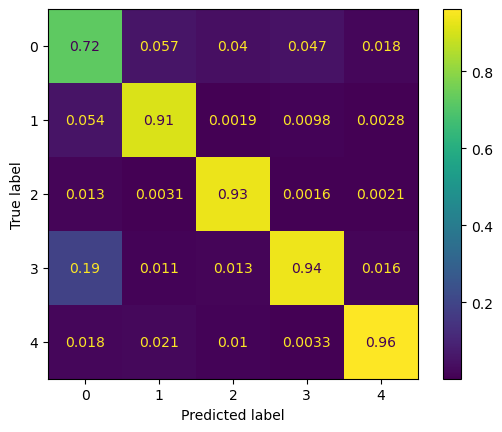

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf1 = confusion_matrix(y_Test_1, y_pred_1, normalize='pred')
ConfusionMatrixDisplay(conf1).plot()

In [34]:
filename = "randomforest_results_2.txt"

with open(filename, 'w') as f:
  f.write('Model 1 Params:\n' + str(model1.get_params())+ '\n\n')
  f.write(Model_1_Results + '\n\n')
  f.write('Model 2 Params:\n' + str(model2.get_params())+ '\n\n')
  f.write(Model_2_Results + '\n\n')
  f.write('Model 3 Params:\n' + str(model3.get_params())+ '\n\n')
  f.write(Model_3_Results + '\n\n')
  f.close()